<a href="https://colab.research.google.com/github/ajaysaikiran2208/Natural-Language-Processing/blob/main/Question_and_Answers_using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questions and Answers using BERT

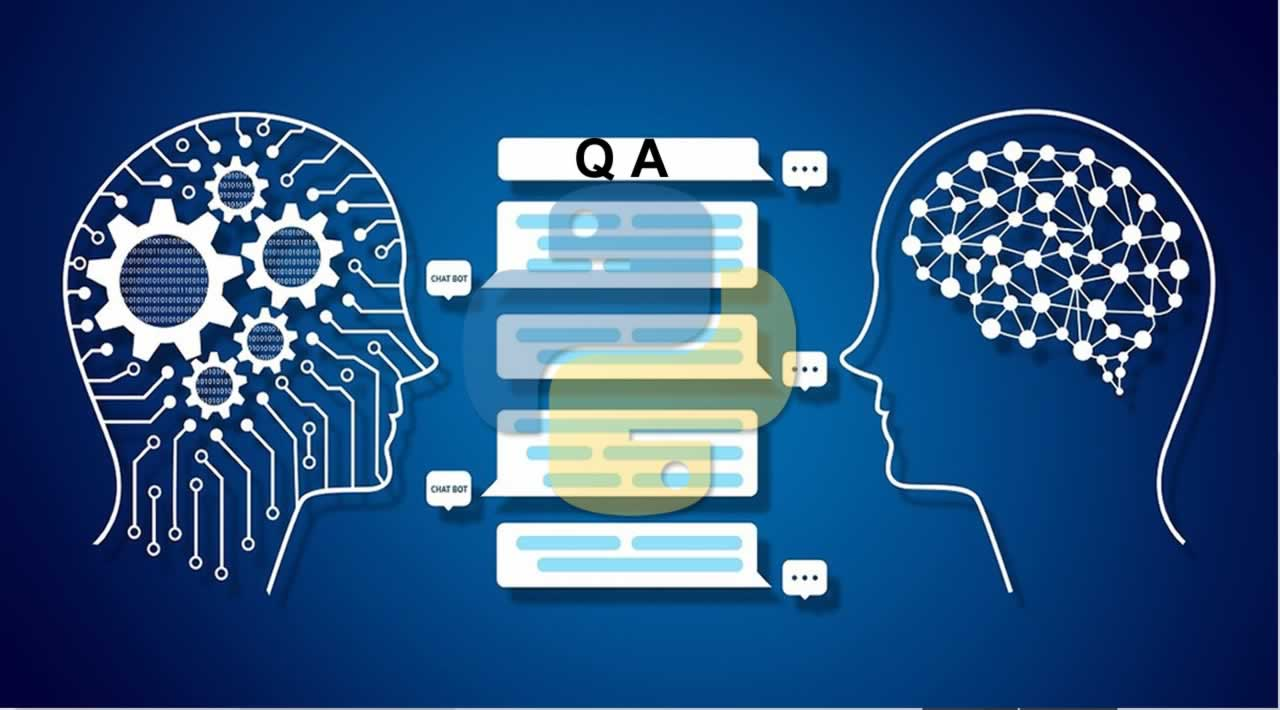

In [1]:
!pip install transformers
!pip install torch

     |████████████████████████████████| 2.5 MB 14.8 MB/s 
     |████████████████████████████████| 895 kB 51.5 MB/s 
     |████████████████████████████████| 3.3 MB 49.9 MB/s 


In [2]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch
import numpy as np

In [3]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [4]:
tokenizer_for_bert = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [13]:
def bert_question_answer(question, passage, max_len=500):
    
    """
    question: What is the greatness of India
    passage: India is one of the oldest civilizations in the world, 
    spanning a period of more than 4000 years, and witnessing the fusion of several customs and traditions, 
    which are reflective of the rich culture and heritage of the Country.The history of the nation gives a glimpse into the magnanimity of its evolution - 
from a Country reeling under colonialism, to one of the leading economies in the global scenario within a span of fifty years. 
More than anything, the nationalistic fervour of the people is the contributing force behind the culmination of such a development. 
This transformation of the nation instills a sense of national pride in the heart of every Indian within the 
Country and abroad, and this section is a modest attempt at keeping its flame alive.
    """

    #Tokenize input question and passage 
    #Add special tokens - [CLS] and [SEP]
    input_ids = tokenizer_for_bert.encode (question, passage,  max_length= max_len, truncation=True)  
    """
    [101, 2054, 2003, 1996, 2171, 1997, 7858, 3149, 102, 3422, 3143, 2377, 9863, 1997, 3019, 2653, 6364, 1012, 
    2123, 1005, 1056, 5293, 2000, 2066, 1010, 3745, 1998, 4942, 29234, 2026, 3149, 1045, 2290, 6627, 2136, 102]
    """

    #Getting number of tokens in 1st sentence (question) and 2nd sentence (passage that contains answer)
    sep_index = input_ids.index(102) 
    len_question = sep_index + 1   
    len_passage = len(input_ids)- len_question  
    """
    8
    9
    27
    """
    
    #Need to separate question and passage
    #Segment ids will be 0 for question and 1 for passage
    segment_ids =  [0]*len_question + [1]*(len_passage)  
    """
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    """

    #Converting token ids to tokens
    tokens = tokenizer_for_bert.convert_ids_to_tokens(input_ids) 
    """
    tokens = ['[CLS]', 'what', 'is', 'the', 'name', 'of', 'youtube', 'channel', '[SEP]', 'watch', 'complete', 
    'play', '##list', 'of', 'natural', 'language', 'processing', '.', 'don', "'", 't', 'forget', 'to', 'like', 
    ',', 'share', 'and', 'sub', '##scribe', 'my', 'channel', 'i', '##g', 'tech', 'team', '[SEP]']
    """

    #Getting start and end scores for answer
    #Converting input arrays to torch tensors before passing to the model
    start_token_scores = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]) )[0]
    end_token_scores = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]) )[1]
    """
    tensor([[-5.9787, -3.0541, -7.7166, -5.9291, -6.8790, -7.2380, -1.8289, -8.1006,
         -5.9786, -3.9319, -5.6230, -4.1919, -7.2068, -6.7739, -2.3960, -5.9425,
         -5.6828, -8.7007, -4.2650, -8.0987, -8.0837, -7.1799, -7.7863, -5.1605,
         -8.2832, -5.1088, -8.1051, -5.3985, -6.7129, -1.4109, -3.2241,  1.5863,
         -4.9714, -4.1138, -5.9107, -5.9786]], grad_fn=<SqueezeBackward1>)
    tensor([[-2.1025, -2.9121, -5.9192, -6.7459, -6.4667, -5.6418, -1.4504, -3.1943,
         -2.1024, -5.7470, -6.3381, -5.8520, -3.4871, -6.7667, -5.4711, -3.9885,
         -1.2502, -4.0869, -6.4930, -6.3751, -6.1309, -6.9721, -7.5558, -6.4056,
         -6.7456, -5.0527, -7.3854, -7.0440, -4.3720, -3.8936, -2.1085, -5.8211,
         -2.0906, -2.2184,  1.4268, -2.1026]], grad_fn=<SqueezeBackward1>)
    """

    #Converting scores tensors to numpy arrays
    start_token_scores = start_token_scores.detach().numpy().flatten()
    end_token_scores = end_token_scores.detach().numpy().flatten()
    """
    [-5.978666  -3.0541189 -7.7166095 -5.929051  -6.878973  -7.238004
    -1.8289301 -8.10058   -5.9786286 -3.9319289 -5.6229596 -4.191908
    -7.20684   -6.773916  -2.3959794 -5.942456  -5.6827617 -8.700695
    -4.265001  -8.09874   -8.083673  -7.179875  -7.7863474 -5.16046
    -8.283156  -5.108819  -8.1051235 -5.3984528 -6.7128663 -1.4108785
    -3.2240815  1.5863497 -4.9714    -4.113782  -5.9107194 -5.9786243]

    [-2.1025064 -2.912148  -5.9192414 -6.745929  -6.466673  -5.641759
    -1.4504088 -3.1943028 -2.1024144 -5.747039  -6.3380575 -5.852047
    -3.487066  -6.7667046 -5.471078  -3.9884708 -1.2501552 -4.0868535
    -6.4929943 -6.375147  -6.130891  -6.972091  -7.5557766 -6.405638
    -6.7455807 -5.0527067 -7.3854156 -7.043977  -4.37199   -3.8935976
    -2.1084964 -5.8210607 -2.0906193 -2.2184045  1.4268283 -2.1025767]
    """
    #Getting start and end index of answer based on highest scores
    answer_start_index = np.argmax(start_token_scores)
    answer_end_index = np.argmax(end_token_scores)
    """
    31
    34
    """

    #Getting scores for start and end token of the answer
    start_token_score = np.round(start_token_scores[answer_start_index], 2)
    end_token_score = np.round(end_token_scores[answer_end_index], 2)
    """
    1.59
    1.43
    """

    #Combining subwords starting with ## and get full words in output. 
    #It is because tokenizer breaks words which are not in its vocab.
    answer = tokens[answer_start_index] 
    for i in range(answer_start_index + 1, answer_end_index + 1):
        if tokens[i][0:2] == '##':  
            answer += tokens[i][2:] 
        else:
            answer += ' ' + tokens[i]  

    # If the answer didn't find in the passage
    if ( answer_start_index == 0) or (start_token_score < 0 ) or  (answer == '[SEP]') or ( answer_end_index <  answer_start_index):
        answer = "Sorry!, I could not find an answer in the passage."
    
    return (answer_start_index, answer_end_index, start_token_score, end_token_score,  answer)

#Testing function
bert_question_answer("greatness of India",'India is one of the oldest civilizations in the world,spanning a period of more than 4000 years, and witnessing the fusion of several customs and traditions,which are reflective of the rich culture and heritage of the Country.The history of the nation gives a glimpse into the magnanimity of its evolution -from a Country reeling under colonialism, to one of the leading economies in the global scenario within a span of fifty years.More than anything, the nationalistic fervour of the people is the contributing force behind the culmination of such a development.This transformation of the nation instills a sense of national pride in the heart of every Indian within the Country and abroad, and this section is a modest attempt at keeping its flame alive')

(6, 15, 2.52, 3.36, 'india is one of the oldest civilizations in the world')

In [18]:
# Let me define one passage
passage = """If you ask Indians what sort of India they want, almost all will say they want a powerful and prosperous one. 
The most powerful nation in the world is the United States of America, which is also one of the most prosperous. 
It has an economy 10 times the size of India’s and it has one fourth the population. This means that in terms of Gross Domestic Product, 
it is 40 times India’s size per person.
We want to be a nation like the United States of America, which is rich, 
large, militarily powerful and feared and respected by the whole world. There is another 
type of powerful nation which is China. It is also rich (China’s economy is six times bigger than India’s) and strong militarily.
What is the difference between the power of these two nations? I think that comes down 
to another question: who and what makes the country powerful? In India, the assumption is that it is the government. 
It is a strong leader like the current prime minister who will produce something special with his genius. He will do the work that is required to 
transform India. I have known Narendra Modi personally for many years and I can say that he himself also believes that.
China has more or less followed the same philosophy of the government taking the lead. 
It is undeniably true that the Chinese people are very talented and extremely hardworking and if you go the nations of Southeast Asia, 
like Thailand, Malaysia and Singapore and to places like the western United States, you will notice this quality in the Chinese immigrants. 
But it has been the Communist government and one-man rule that has led the way to their modern strength. In many ways, however, this has been a 
limited strength. The lack of freedom has 
meant that China is not particularly inventive. And this will ultimately stop it from matching America.. """

print (f'Length of the passage: {len(passage.split())} words')

question1 ="Why India is great" 
print ('\nQuestion 1:\n', question1)
_, _ , _ , _, ans  = bert_question_answer( question1, passage)
print('\nAnswer from BERT: ', ans ,  '\n')

question1 ="How many times America GDP is greater than India" 
print ('\nQuestion 1:\n', question1)
_, _ , _ , _, ans  = bert_question_answer( question1, passage)
print('\nAnswer from BERT: ', ans ,  '\n')


Length of the passage: 321 words

Question 1:
 Why India is great

Answer from BERT:  powerful and prosperous 


Question 1:
 How many times America GDP is greater than India

Answer from BERT:  40 



In [9]:
# Let me define another passage
passage= """Machine learning (ML) is the study of computer algorithms that 
improve automatically through experience and by the use of data. 
It is seen as a part of artificial intelligence. Machine learning algorithms 
build a model based on sample data, known as "training data", in order to make predictions or decisions without being 
explicitly programmed to do so.Machine learning algorithms are used in a wide variety of applications, such as in medicine, 
email filtering, speech recognition, and 
computer vision, where it is difficult or unfeasible to develop 
conventional algorithms to perform the needed tasks.A subset of machine learning is closely related to 
computational statistics, which focuses on making predictions using computers; but not all machine learning is 
statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of 
machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised 
learning.In its application 
across business problems, machine learning is also referred to as predictive analytics.
"""

print (f'Length of the passage: {len(passage.split())} words')


question ="What is Machine Learning"
print ('\nQuestion 1:\n', question)
_, _ , _ , _, ans  = bert_question_answer( question, passage)
print('\nAnswer from BERT: ', ans ,  '\n')

question ="What is predictive analytics"
print ('\nQuestion 2:\n', question)
_, _ , _ , _, ans  = bert_question_answer( question, passage)
print('\nAnswer from BERT: ', ans ,  '\n')


question ="What is data mining"
print ('\nQuestion 3:\n', question)
_, _ , _ , _, ans  = bert_question_answer( question, passage)
print('\nAnswer from BERT: ', ans ,  '\n')




Length of the passage: 165 words

Question 1:
 What is Machine Learning

Answer from BERT:  the study of computer algorithms that improve automatically through experience and by the use of data 


Question 2:
 What is predictive analytics

Answer from BERT:  machine learning 


Question 3:
 What is data mining

Answer from BERT:  focusing on exploratory data analysis through unsupervised learning 

